<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Artificial-Intelligence/blob/main/TF04_RNN_e_Classifica%C3%A7%C3%A3o_de_Textos_Slide_48_Senoidal_Predi%C3%A7%C3%A3o_de_S%C3%A9rie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodrigo Rene Menegazzo

Prática: Predição de uma Senoidal

Senoidal
  * Fabricar uma série temporal
  * Adicionar ruído
  * Tentar predizer os próximos valores
  * Usaremos uma SimpleRNN

Importações

In [2]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Criação dos dados

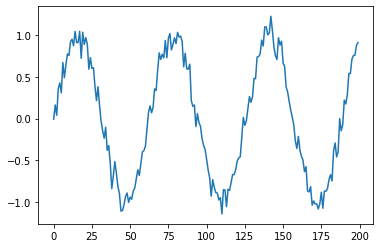

In [21]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

Criação do dataset (dimensões corretas – N x T x D)

In [39]:
T = 10 # tamanho da janela
D = 1 # quantidade de dados
X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)

print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


Criação do modelo

In [40]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation="relu")(i)
x = Dense(1)(x)
model = Model(i, x)

Compilação do modelo

In [41]:
model.compile(
loss="mse",
optimizer=Adam(lr=0.1)
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Ajuste do modelo

Usa
  * Metade da base para treino : X[:-N//2], Y[:-N//2]
  * Metade para teste : X[-N//2:], Y[-N//2:]

In [47]:
r = model.fit(
X[:-N//2], Y[:-N//2],    # X é todas as linhas até -95, que é de 10 em 10 para cada Y que é o próximo valor após cada 10 elementos.
epochs=80,
validation_data=(X[-N//2:], Y[-N//2:])    # mesma coisa do anterior mas a partir dos -95 até o final
)

Epoch 1/80
3/3 [==============================] - 1s 116ms/step - loss: 0.8762 - val_loss: 0.1387
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0803 - val_loss: 0.1195
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0796 - val_loss: 0.0692
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0482 - val_loss: 0.0831
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0686 - val_loss: 0.0676
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0589 - val_loss: 0.0659
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0573 - val_loss: 0.0521
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0483 - val_loss: 0.0508
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0439 - val_loss: 0.0414
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0375 - val_loss: 0.0370
Epoch 11/80
3/3 [===========

Plotar a função de perda

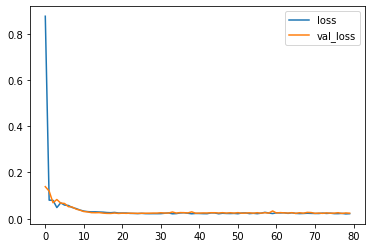

In [48]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

Predições: 1-step

In [59]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2
while len(validation_predictions) < len(validation_target):
    p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
    i += 1
    validation_predictions.append(p)

In [65]:
for i in range(10):
  print("target: ", validation_target[i])
  print("prediction: ", validation_predictions[i])

target:  -0.8290567801794386
prediction:  -0.7189702
target:  -0.8899320693471904
prediction:  -0.76738304
target:  -0.8951918260227109
prediction:  -0.90298975
target:  -0.9781818513786734
prediction:  -0.92628366
target:  -0.9511249083353006
prediction:  -0.9763541
target:  -1.146210109091485
prediction:  -0.9042753
target:  -0.8541944398473138
prediction:  -1.0233557
target:  -0.857430741580455
prediction:  -0.7754508
target:  -1.0583423823024065
prediction:  -0.63162637
target:  -0.8490865231967983
prediction:  -0.94402915


Plotar Observado x Predito

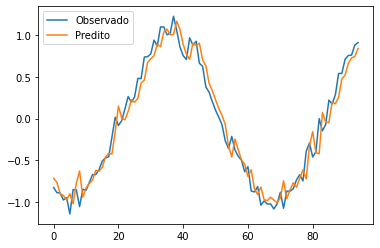

In [66]:
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()